In [1]:
dataset_name = "W19_only"
df_list = 'BES_Panel'
#            'BES_reduced_with_na'
#           ]#,"BESnumeric"]

%matplotlib inline 
%run BES_header.py {dataset_name} {df_list}

# del BES_Panel

Toggle code

In [7]:
search(BES_Panel,"subjClass")

subjClass           32177
subjClassSqueeze    11125
dtype: int64

In [8]:
BES_Panel["subjClass"].value_counts()

Yes, working class    12122
No                     9285
Yes, middle class      8930
Don't know             1378
Yes, other              462
Name: subjClass, dtype: int64

In [9]:
BES_Panel["subjClassSqueeze"].value_counts()

Working class    4209
Middle class     3670
9999.0           3246
Name: subjClassSqueeze, dtype: int64

In [94]:
BES_Panel["profile_education_age"] = BES_Panel["profile_education_age"].cat.rename_categories(["15 or under","16","17-18","19","20+","Still at school/FT ed","Can't remember"])
BES_Panel["JACS_subject"] = BES_Panel["JACS_subject"].replace("","No Subject")
BES_Panel["jobzone"] = BES_Panel["jobzone"].astype('category').cat.rename_categories(["occupations that need little or no preparation","occupations that need some preparation",
"occupations that need medium preparation","occupations that need considerable preparation",
"occupations that need extensive preparation"])
BES_Panel["profile_work_type"] = BES_Panel["profile_work_type"].cat.rename_categories( ["Professional or higher technical work / higher managerial","Manager or Senior Administrator / intermediate managerial",
"Clerical/junior managerial/professional/administrator","Sales or Services","Foreman or Supervisor","Skilled Manual Work","Semi-Skilled or Unskilled Manual Work",
'Other', 'Have never worked'] )
BES_Panel["country"] = BES_Panel["country"].replace({1:"England",2:"Scotland",3:"Wales"}).astype('category')

In [123]:
BES_Panel["WC_or_MC"] = BES_Panel["subjClassSqueeze"].replace(9999.0,np.nan)
mask = BES_Panel["WC_or_MC"].notnull()

drop_cols = ["subjClassSqueeze","subjClass",'starttime', 'endtime', 'respdate','WC_or_MC',
            "institution_dk_1","uniname_status","JACS_subject","degreeCheck","pastvote_eup_2019",
            'profile_eurefvote',"anyUni","edlevel","pano","profile_work_stat"]
df_simp = pd.get_dummies(BES_Panel.drop(drop_cols,axis=1))
df_simp["WC_or_MC"] = BES_Panel["WC_or_MC"]

df_simp["WC_or_MC"] = df_simp["WC_or_MC"].cat.codes.replace(-1,np.nan)

In [125]:
df_simp["WC_or_MC"].value_counts(dropna=False)

NaN    24298
1.0     4209
0.0     3670
Name: WC_or_MC, dtype: int64

In [126]:
BES_Panel["subjClassSqueeze"].replace(9999.0,np.nan).value_counts()

Working class    4209
Middle class     3670
Name: subjClassSqueeze, dtype: int64

In [127]:
BES_Panel["subjClass"].replace(9999.0,np.nan).value_counts()

Yes, working class    12122
No                     9285
Yes, middle class      8930
Don't know             1378
Yes, other              462
Name: subjClass, dtype: int64

In [128]:
# df_simp.select_dtypes('datetime').columns

MSE: 0.20, MAE: 0.41, EV: 0.18, R2: 0.18


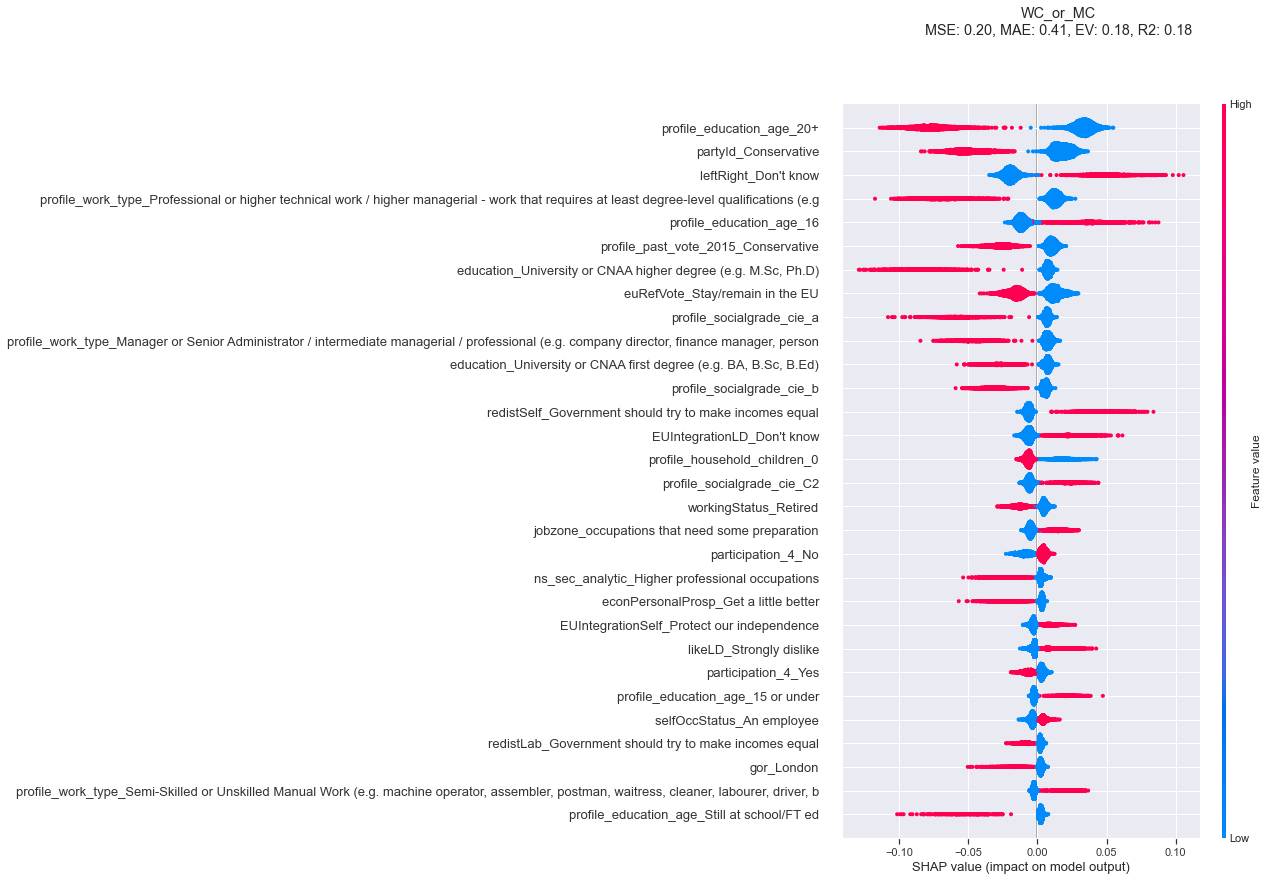

In [129]:
# df_simp = pd.get_dummies(BES_census_data.drop(drop_cols,axis=1))

var_stub = "WC_or_MC"
Treatment = var_stub

var_list = [var_stub]
var_stub_list = [var_stub,]
mask = df_simp[var_stub].notnull()
wt_cols = []
min_features = 30
colname = var_stub
dependence_plots = False

alg = get_xgboost_alg(classification_problem=False)
title = var_stub

(explainer, shap_values, train_columns, train_index, alg,output_subfolder)=\
    xgboost_run(subdir=colname,dataset=df_simp.drop("wt",axis=1),
            var_list=var_list,var_stub_list=var_stub_list,
            use_specific_weights=df_simp["wt"],
            min_features = min(df_simp.shape[1]-1,min_features),verbosity=0,
            skip_bar_plot=True,dependence_plots=dependence_plots,alg=alg,eval_metric=eval_metric,                    
            title = title)

In [210]:
BES_Panel["WC_or_MC"] = BES_Panel["subjClass"].replace(9999.0,np.nan)
mask = BES_Panel["WC_or_MC"].notnull()

drop_cols = ["subjClassSqueeze","subjClass",'starttime', 'endtime', 'respdate','WC_or_MC',
            "institution_dk_1","uniname_status","JACS_subject","degreeCheck","pastvote_eup_2019",
            'profile_eurefvote',"anyUni","edlevel","pano","profile_work_stat","subjClassFullSq"]
df_simp = pd.get_dummies(BES_Panel.drop(drop_cols,axis=1))
df_simp["WC_or_MC"] = BES_Panel["WC_or_MC"]

df_simp["WC_or_MC"] = df_simp["WC_or_MC"].cat.codes.replace(-1,np.nan)

In [136]:
df_simp["WC_or_MC"] = BES_Panel["subjClass"].replace({"Yes, other":np.nan})
df_simp["WC_or_MC"].value_counts(dropna=False)

[22:16:39] WARNING: ..\src\learner.cc:573: 
Parameters: { "scale_pos_weight" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:23:36] WARNING: ..\src\learner.cc:573: 
Parameters: { "scale_pos_weight" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


ACC: 0.56,  F1: 0.56
[22:23:38] WARNING: ..\src\learner.cc:573: 
Parameters: { "scale_pos_weight" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open a

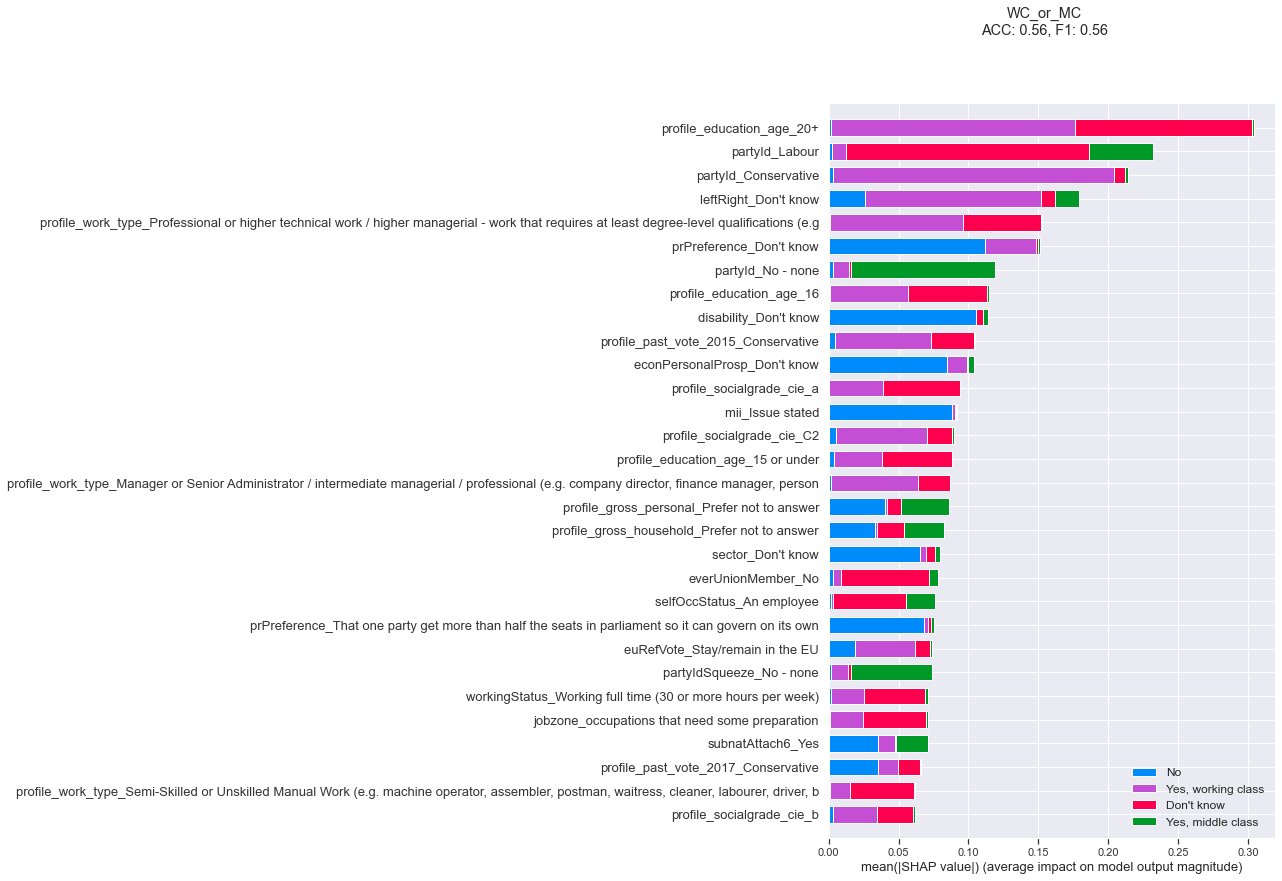

In [144]:
# df_simp = pd.get_dummies(BES_census_data.drop(drop_cols,axis=1))

var_stub = "WC_or_MC"
Treatment = var_stub

var_list = [var_stub]
var_stub_list = [var_stub,]
mask = df_simp[var_stub].notnull()
wt_cols = []
min_features = 30
colname = var_stub
dependence_plots = False

objective = 'multi:softmax'
eval_metric = 'mlogloss'


alg = get_xgboost_alg(classification_problem=True)
title = var_stub

(explainer, shap_values, train_columns, train_index, alg,output_subfolder)=\
    xgboost_run(subdir=colname,dataset=df_simp.drop("wt",axis=1),
            var_list=var_list,var_stub_list=var_stub_list,
            use_specific_weights=df_simp["wt"],
            min_features = min(df_simp.shape[1]-1,min_features),verbosity=0,
            skip_bar_plot=True,dependence_plots=dependence_plots,alg=alg,eval_metric=eval_metric,                    
            title = title)

In [145]:
# get_xgboost_alg(classification_problem=True)

In [155]:
df_simp["WC_or_MC"] = BES_Panel["subjClass"].replace({"Yes, other":np.nan,
                                                      "Don't know":np.nan,
                                                      "No":np.nan,
                                                     })
df_simp["WC_or_MC"].value_counts(dropna=False)
df_simp["WC_or_MC"] = df_simp["WC_or_MC"]=="Yes, middle class"
df_simp["WC_or_MC"] = df_simp["WC_or_MC"].astype('float')

MSE: 0.24, MAE: 0.24, EV: -0.11, R2: -0.16


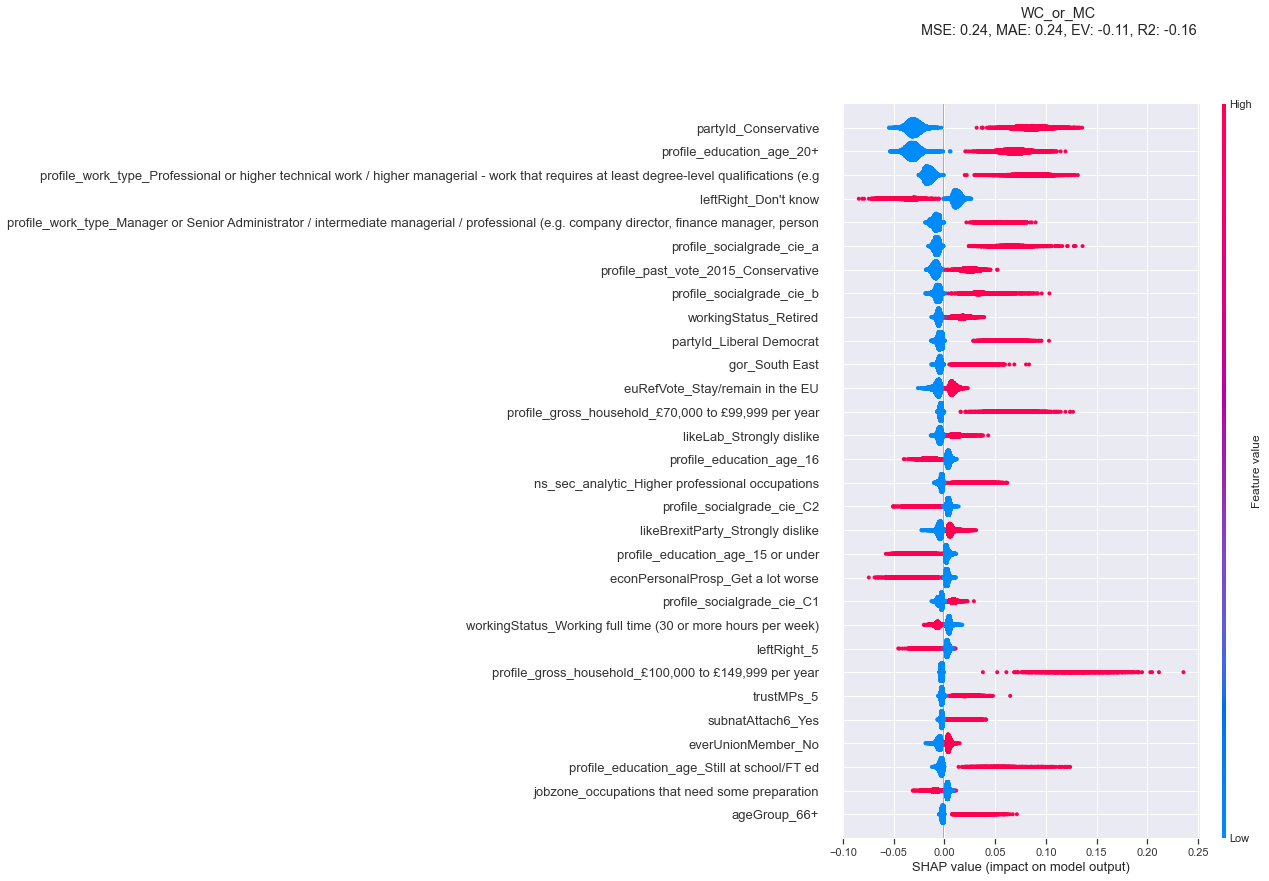

In [156]:
# df_simp = pd.get_dummies(BES_census_data.drop(drop_cols,axis=1))

var_stub = "WC_or_MC"
Treatment = var_stub

var_list = [var_stub]
var_stub_list = [var_stub,]
mask = df_simp[var_stub].notnull()
wt_cols = []
min_features = 30
colname = var_stub
dependence_plots = False

objective = 'reg:squarederror'
eval_metric = 'rmse'


alg = get_xgboost_alg(classification_problem=True)
title = var_stub

(explainer, shap_values, train_columns, train_index, alg,output_subfolder)=\
    xgboost_run(subdir=colname,dataset=df_simp.drop("wt",axis=1),
            var_list=var_list,var_stub_list=var_stub_list,
            use_specific_weights=df_simp["wt"],
            min_features = min(df_simp.shape[1]-1,min_features),verbosity=0,
            skip_bar_plot=True,dependence_plots=dependence_plots,alg=alg,eval_metric=eval_metric,                    
            title = title)

In [162]:
df_simp["WC_or_MC"] = BES_Panel["subjClass"].replace({"Yes, other":np.nan,
                                                      "Don't know":np.nan,
#                                                       "No":np.nan,
                                                     })
# df_simp["WC_or_MC"].value_counts(dropna=False)
df_simp["WC_or_MC"] = df_simp["WC_or_MC"].replace({"No":1,
                                                   "Yes, working class":0,
                                                   "Yes, middle class":0,
                                                  
                                                  })
df_simp["WC_or_MC"] = df_simp["WC_or_MC"].astype('float')
df_simp["WC_or_MC"].value_counts(dropna=False)

0.0    21052
1.0     9285
NaN     1840
Name: WC_or_MC, dtype: int64

MSE: 0.30, MAE: 0.30, EV: -0.20, R2: -0.40


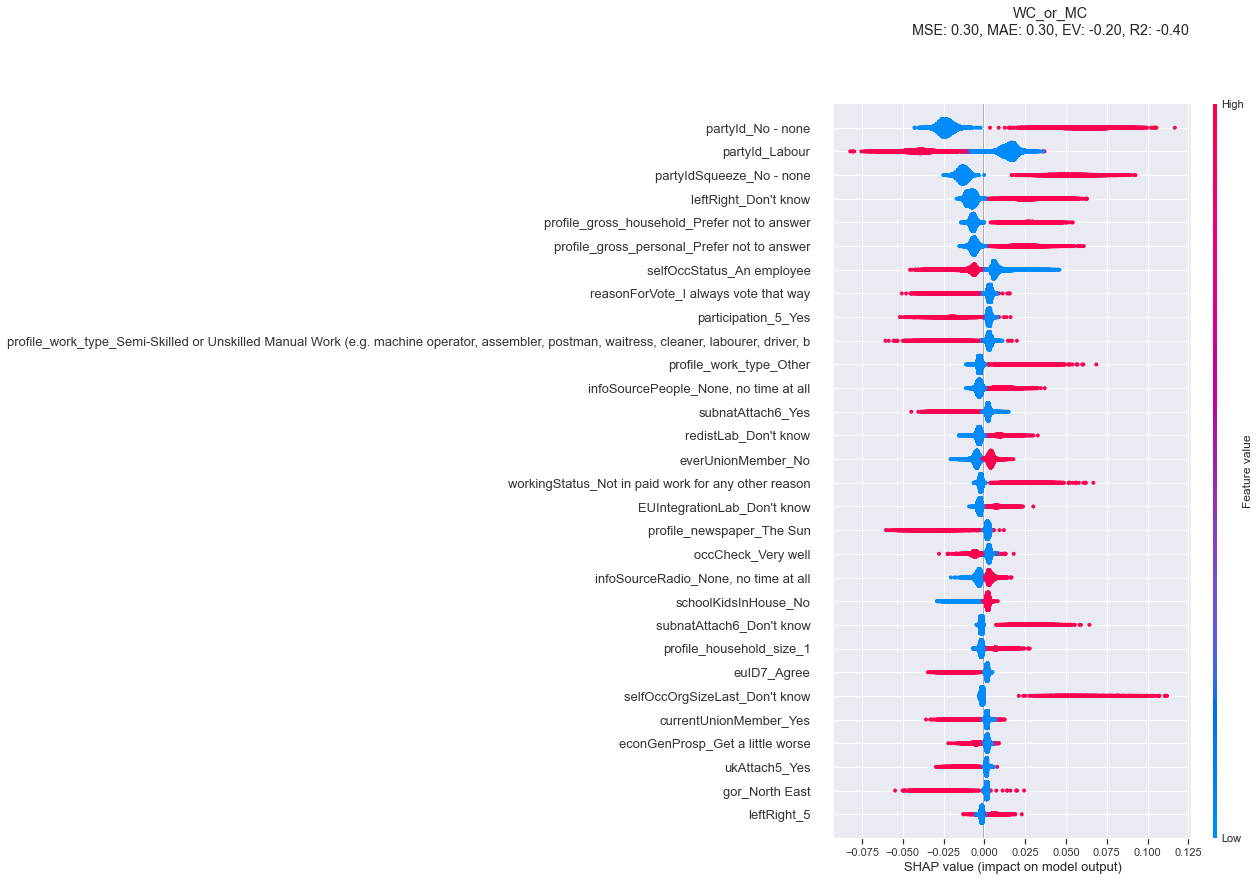

In [163]:
# df_simp = pd.get_dummies(BES_census_data.drop(drop_cols,axis=1))

var_stub = "WC_or_MC"
Treatment = var_stub

var_list = [var_stub]
var_stub_list = [var_stub,]
mask = df_simp[var_stub].notnull()
wt_cols = []
min_features = 30
colname = var_stub
dependence_plots = False

objective = 'reg:squarederror'
eval_metric = 'rmse'


alg = get_xgboost_alg(classification_problem=True)
title = var_stub

(explainer, shap_values, train_columns, train_index, alg,output_subfolder)=\
    xgboost_run(subdir=colname,dataset=df_simp.drop("wt",axis=1),
            var_list=var_list,var_stub_list=var_stub_list,
            use_specific_weights=df_simp["wt"],
            min_features = min(df_simp.shape[1]-1,min_features),verbosity=0,
            skip_bar_plot=True,dependence_plots=dependence_plots,alg=alg,eval_metric=eval_metric,                    
            title = title)

MSE: 0.30, MAE: 0.30, EV: -0.20, R2: -0.40


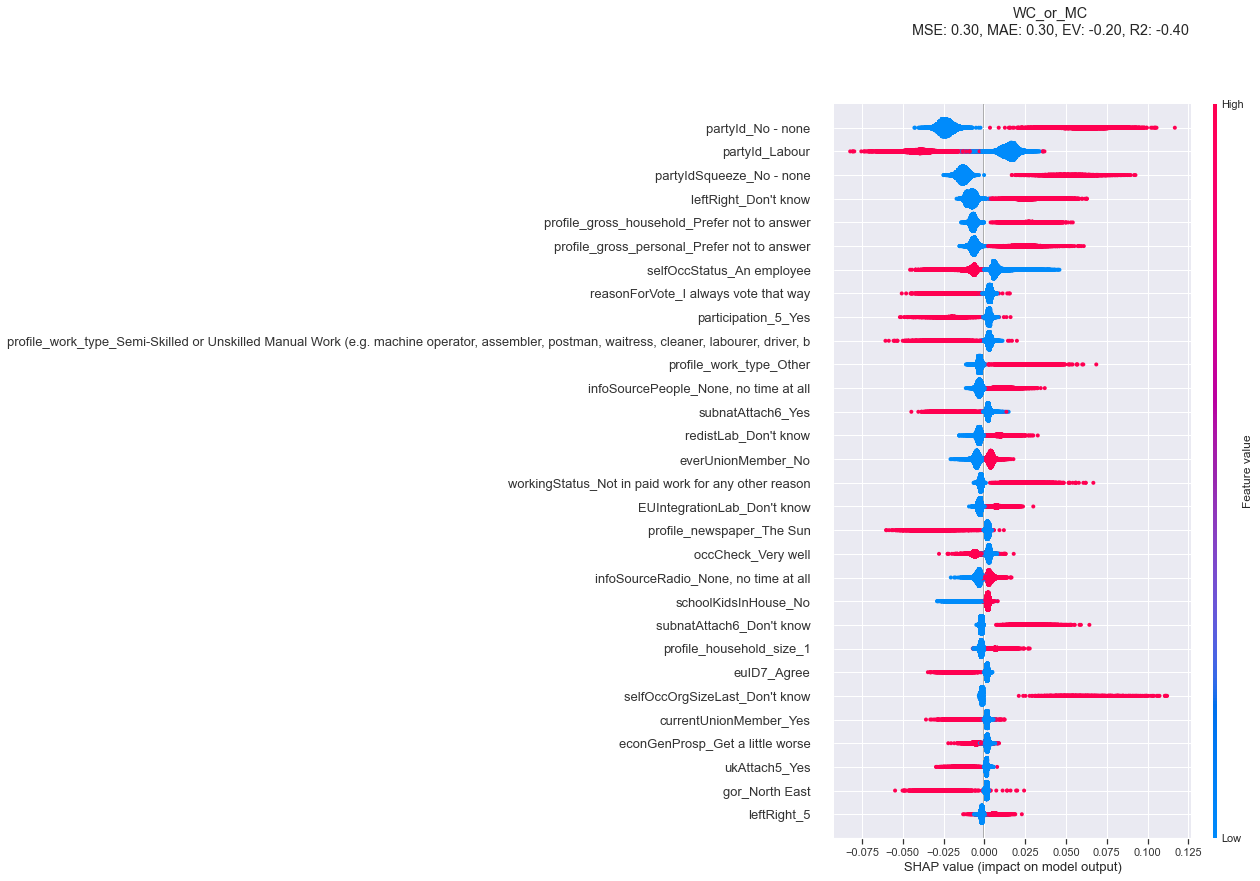

In [164]:
# df_simp = pd.get_dummies(BES_census_data.drop(drop_cols,axis=1))

var_stub = "WC_or_MC"
Treatment = var_stub

var_list = [var_stub]
var_stub_list = [var_stub,]
mask = df_simp[var_stub].notnull()
wt_cols = []
min_features = 30
colname = var_stub
dependence_plots = False

objective = 'binary:logistic'
eval_metric = 'auc'


alg = get_xgboost_alg(classification_problem=True)
title = var_stub

(explainer, shap_values, train_columns, train_index, alg,output_subfolder)=\
    xgboost_run(subdir=colname,dataset=df_simp.drop("wt",axis=1),
            var_list=var_list,var_stub_list=var_stub_list,
            use_specific_weights=df_simp["wt"],
            min_features = min(df_simp.shape[1]-1,min_features),verbosity=0,
            skip_bar_plot=True,dependence_plots=dependence_plots,alg=alg,eval_metric=eval_metric,                    
            title = title)

In [ ]:
subjClass           32177
subjClassSqueeze    11125

In [167]:
BES_Panel["subjClass"].groupby(BES_Panel["subjClassSqueeze"]).value_counts()

subjClassSqueeze  subjClass 
Middle class      No            3123
                  Don't know     339
                  Yes, other     208
Working class     No            3707
                  Don't know     328
                  Yes, other     174
9999.0            No            2455
                  Don't know     711
                  Yes, other      80
Name: subjClass, dtype: int64

In [169]:
BES_Panel["subjClass"].value_counts()

Yes, working class    12122
No                     9285
Yes, middle class      8930
Don't know             1378
Yes, other              462
Name: subjClass, dtype: int64

In [171]:
BES_Panel["subjClassSqueeze"].value_counts().sum()

11125

In [172]:
9285+1378+462

11125

In [196]:
BES_Panel["subjClassFullSq"] = BES_Panel["subjClass"].astype('object')
BES_Panel["subjClassFullSq"][BES_Panel["subjClassSqueeze"].notnull()] = BES_Panel["subjClassSqueeze"][BES_Panel["subjClassSqueeze"].notnull()]

In [197]:
BES_Panel["subjClassFullSq"] = BES_Panel["subjClassFullSq"].replace({"Yes, working class":"Working class","Yes, middle class":"Middle class",9999.0:np.nan})
BES_Panel["subjClassFullSq"] = BES_Panel["subjClassFullSq"].astype('category')
BES_Panel["subjClassFullSq"].value_counts()

Working class    16331
Middle class     12600
Name: subjClassFullSq, dtype: int64

ACC: 0.75,  F1: 0.75


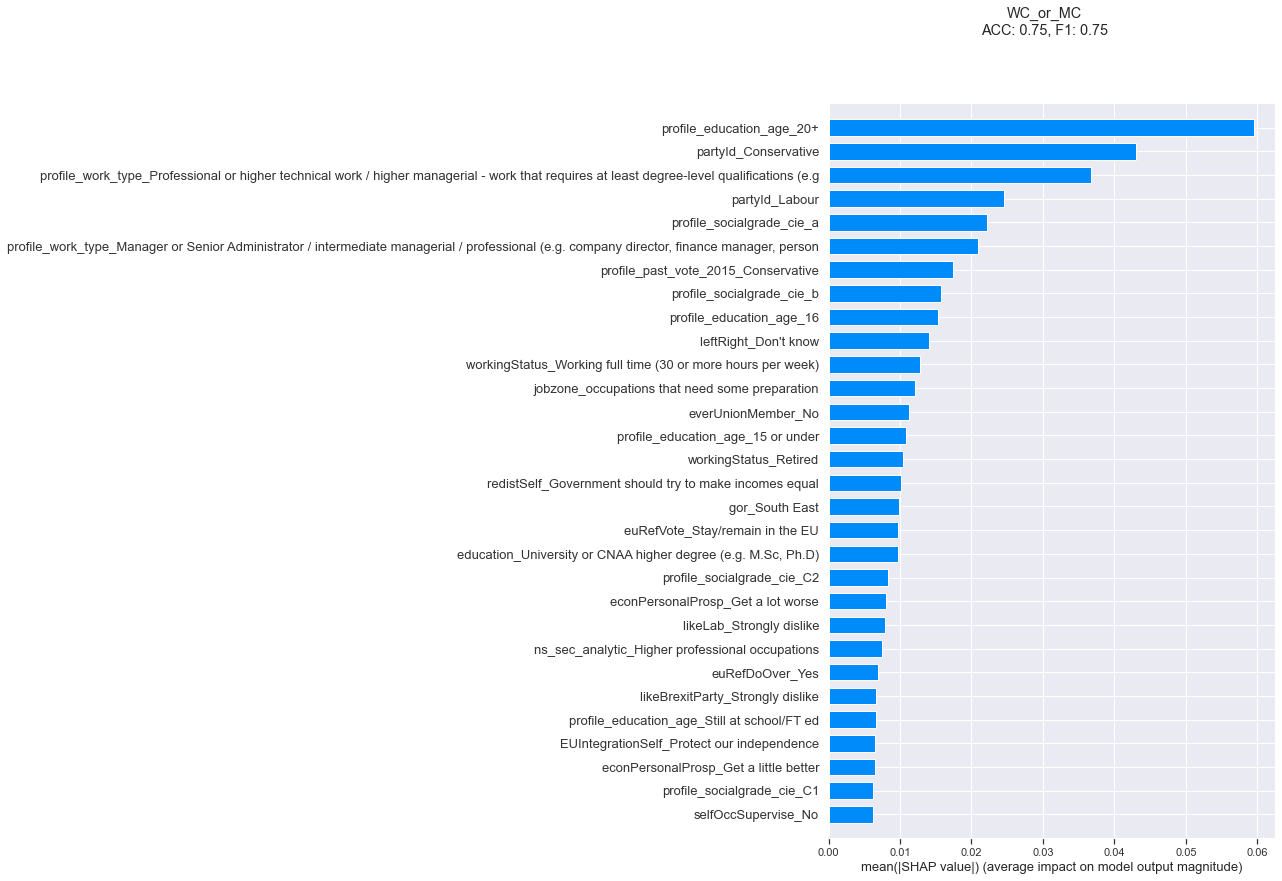

In [203]:
df_simp["WC_or_MC"] = BES_Panel["subjClassFullSq"]

var_stub = "WC_or_MC"
Treatment = var_stub

var_list = [var_stub]
var_stub_list = [var_stub,]
mask = df_simp[var_stub].notnull()
wt_cols = []
min_features = 30
colname = var_stub
dependence_plots = False

objective = 'binary:logistic'
eval_metric = 'auc'


alg = get_xgboost_alg(classification_problem=True)
title = var_stub

(explainer, shap_values, train_columns, train_index, alg,output_subfolder)=\
    xgboost_run(subdir=colname,dataset=df_simp.drop("wt",axis=1),
            var_list=var_list,var_stub_list=var_stub_list,
            use_specific_weights=df_simp["wt"],
            min_features = min(df_simp.shape[1]-1,min_features),verbosity=0,
            skip_bar_plot=True,dependence_plots=dependence_plots,alg=alg,eval_metric=eval_metric,                    
            title = title)

MSE: 0.24, MAE: 0.24, EV: 0.03, R2: 0.03


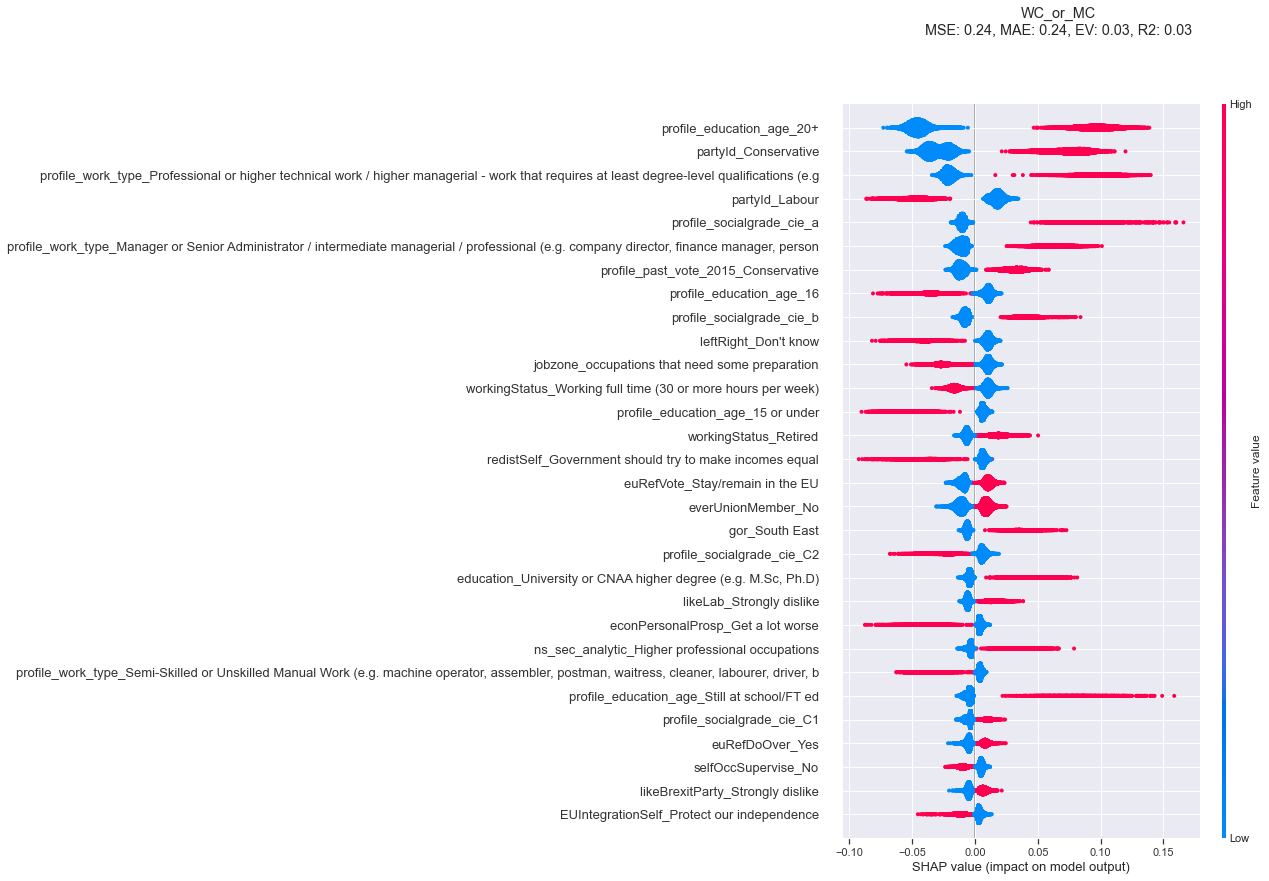

Wall time: 3min 34s


In [204]:
%%time
df_simp["WC_or_MC"] = BES_Panel["subjClassFullSq"].replace({"Middle class":1,"Working class":0,})

var_stub = "WC_or_MC"
Treatment = var_stub

var_list = [var_stub]
var_stub_list = [var_stub,]
mask = df_simp[var_stub].notnull()
wt_cols = []
min_features = 30
colname = var_stub
dependence_plots = False

objective = 'binary:logistic'
eval_metric = 'auc'


alg = get_xgboost_alg(classification_problem=True)
title = var_stub

(explainer, shap_values, train_columns, train_index, alg,output_subfolder)=\
    xgboost_run(subdir=colname,dataset=df_simp.drop("wt",axis=1),
            var_list=var_list,var_stub_list=var_stub_list,
            use_specific_weights=df_simp["wt"],
            min_features = min(df_simp.shape[1]-1,min_features),verbosity=0,
            skip_bar_plot=True,dependence_plots=dependence_plots,alg=alg,eval_metric=eval_metric,                    
            title = title)

MSE: 0.24, MAE: 0.24, EV: 0.03, R2: 0.03


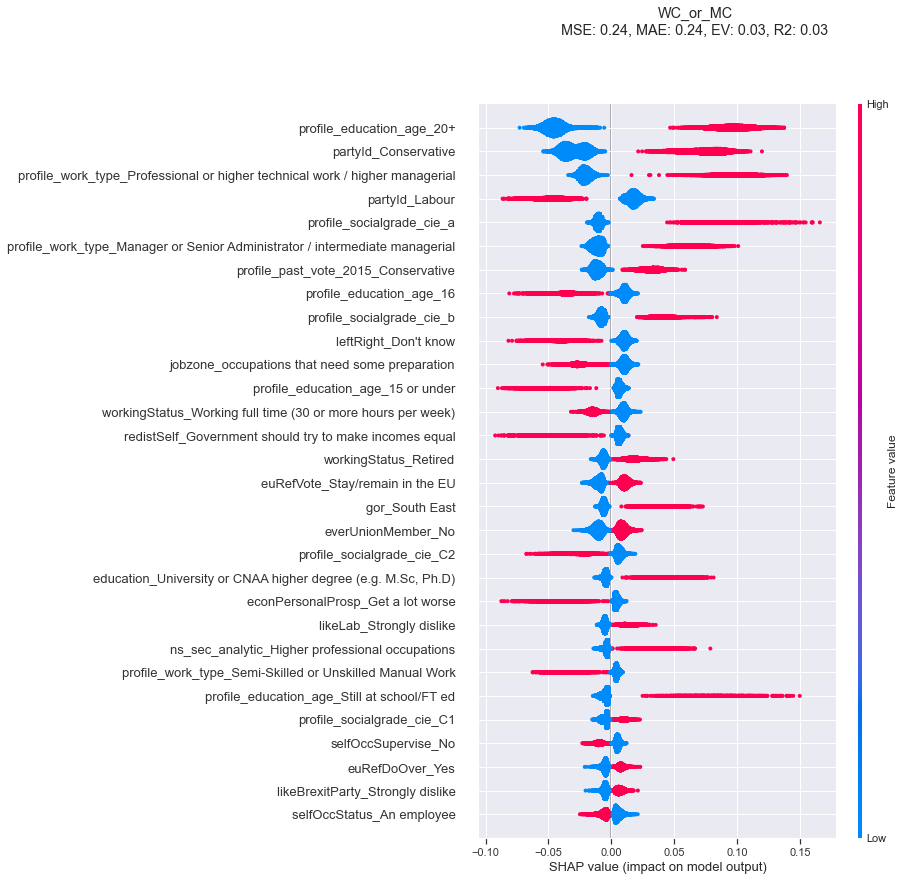

Wall time: 2min 43s


In [211]:
%%time
df_simp["WC_or_MC"] = BES_Panel["subjClassFullSq"].replace({"Middle class":1,"Working class":0,})

var_stub = "WC_or_MC"
Treatment = var_stub

var_list = [var_stub]
var_stub_list = [var_stub,]
mask = df_simp[var_stub].notnull()
wt_cols = []
min_features = 30
colname = var_stub
dependence_plots = False

objective = 'binary:logistic'
eval_metric = 'error'


alg = get_xgboost_alg(classification_problem=True)
title = var_stub

(explainer, shap_values, train_columns, train_index, alg,output_subfolder)=\
    xgboost_run(subdir=colname,dataset=df_simp.drop("wt",axis=1),
            var_list=var_list,var_stub_list=var_stub_list,
            use_specific_weights=df_simp["wt"],
            min_features = min(df_simp.shape[1]-1,min_features),verbosity=0,
            skip_bar_plot=True,dependence_plots=dependence_plots,alg=alg,eval_metric=eval_metric,                    
            title = title)

MSE: 0.24, MAE: 0.24, EV: 0.01, R2: 0.01


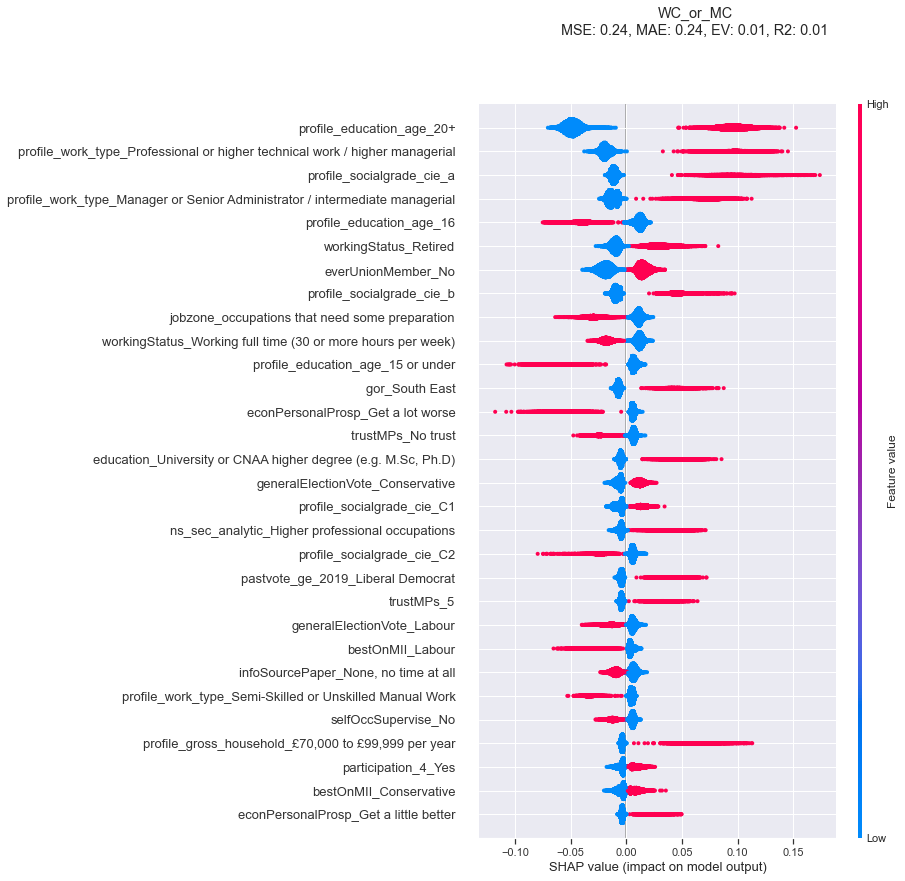

Wall time: 3min 4s


In [215]:
%%time
df_simp["WC_or_MC"] = BES_Panel["subjClassFullSq"].replace({"Middle class":1,"Working class":0,})

var_stub = "WC_or_MC"
Treatment = var_stub

var_list = [var_stub]
var_stub_list = [var_stub,]+["partyId","profile_past_vote","leftRight","redistSelf","euRef","like","EUIntegration"]
mask = df_simp[var_stub].notnull()
wt_cols = []
min_features = 30
colname = var_stub
dependence_plots = False

objective = 'binary:logistic'
eval_metric = 'error'


alg = get_xgboost_alg(classification_problem=True)
title = var_stub

(explainer, shap_values, train_columns, train_index, alg,output_subfolder)=\
    xgboost_run(subdir=colname,dataset=df_simp.drop("wt",axis=1),
            var_list=var_list,var_stub_list=var_stub_list,
            use_specific_weights=df_simp["wt"],
            min_features = min(df_simp.shape[1]-1,min_features),verbosity=0,
            skip_bar_plot=True,dependence_plots=dependence_plots,alg=alg,eval_metric=eval_metric,                    
            title = title)

In [213]:
search(BES_Panel,"social")

socialIdentityGlobalLeave      7909
socialIdentityGlobalRemain     7909
socialDistCon                  8037
socialDistLab                  8037
socialDistBrexit               8037
socialDistRemain               8037
socialDistLeave                8037
socialDistSNP                   811
profile_socialgrade_cie       32177
dtype: int64

In [214]:
BES_Panel["profile_socialgrade_cie"].value_counts()

C1    8324
b     6914
a     5006
C2    4823
e     4043
d     3067
Name: profile_socialgrade_cie, dtype: int64

MSE: 0.24, MAE: 0.24, EV: 0.02, R2: 0.02


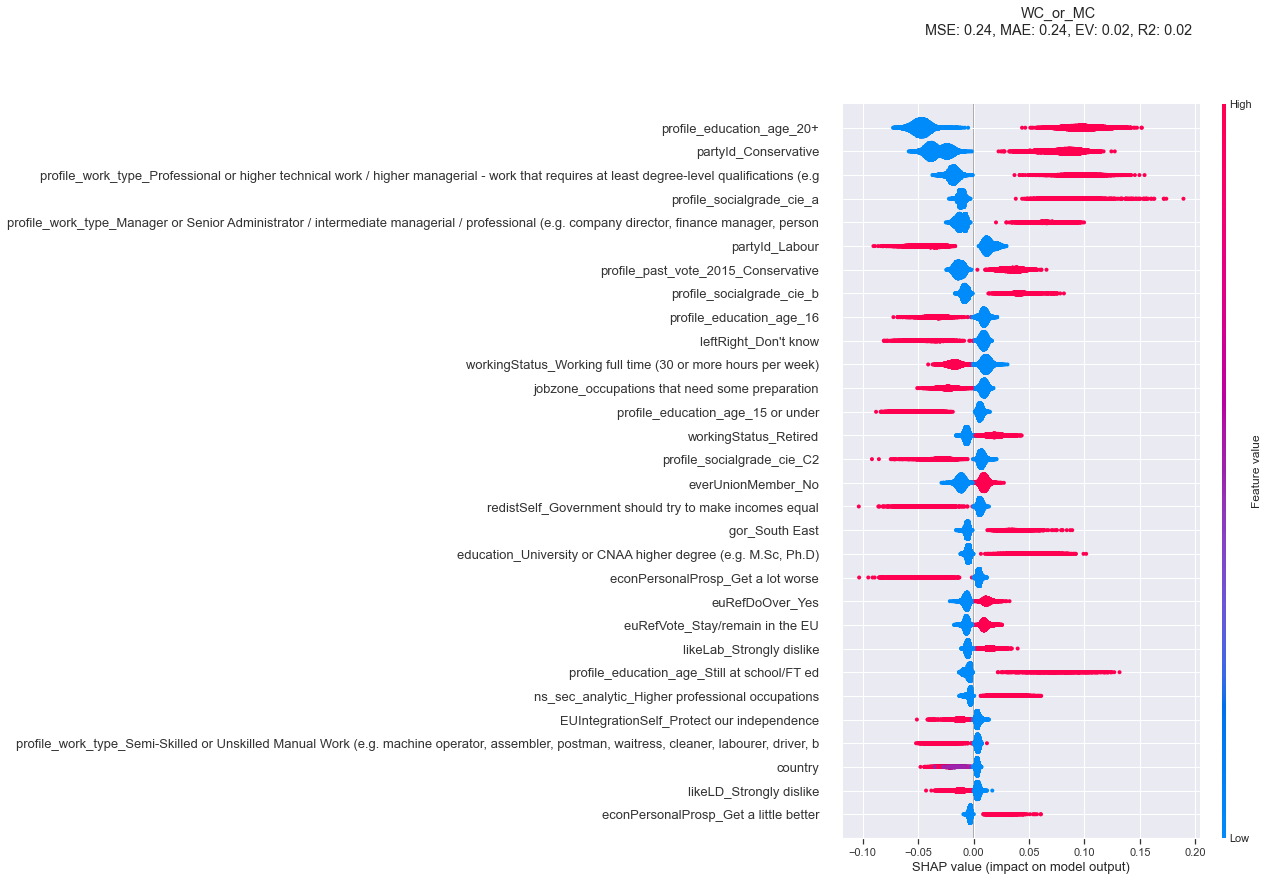

In [188]:
df_simp["WC_or_MC"] = BES_Panel["subjClassFullSq"].replace({"Middle class":1,"Working class":0,})

var_stub = "WC_or_MC"
Treatment = var_stub

var_list = [var_stub]
var_stub_list = [var_stub,]
mask = df_simp[var_stub].notnull()
wt_cols = []
min_features = 30
colname = var_stub
dependence_plots = False

objective = 'reg:squarederror'
eval_metric = 'rmse'


alg = get_xgboost_alg(classification_problem=True)
title = var_stub

(explainer, shap_values, train_columns, train_index, alg,output_subfolder)=\
    xgboost_run(subdir=colname,dataset=df_simp.drop("wt",axis=1),
            var_list=var_list,var_stub_list=var_stub_list,
            use_specific_weights=df_simp["wt"],
            min_features = min(df_simp.shape[1]-1,min_features),verbosity=0,
            skip_bar_plot=True,dependence_plots=dependence_plots,alg=alg,eval_metric=eval_metric,                    
            title = title)

In [ ]:
# JACS (the Joint Academic Coding System) 

# pastvote_eup_2019

In [100]:
BES_Panel["pastvote_eup_2019"].value_counts()

CSE grades 2-5                                           8627
Recognised trade apprenticeship completed                4762
City & Guilds certificate - advanced                     2828
Youth training certificate/skillseekers                  2328
No formal qualifications                                 1601
Clerical and commercial                                   946
CSE grade 1, GCE O level, GCSE, School Certificate        672
Prefer not to say                                         415
Other technical, professional or higher qualification     397
onc                                                       322
City & Guilds certificate                                 288
Name: pastvote_eup_2019, dtype: int64

In [110]:
BES_Panel["pastvote_eup_2019"][BES_Panel["pastvote_ge_2019"]=="Liberal Democrat"].value_counts()

Recognised trade apprenticeship completed                2031
City & Guilds certificate - advanced                      407
CSE grade 1, GCE O level, GCSE, School Certificate        199
No formal qualifications                                   82
CSE grades 2-5                                             77
Youth training certificate/skillseekers                    70
Other technical, professional or higher qualification      35
Prefer not to say                                          33
City & Guilds certificate                                  17
Clerical and commercial                                    13
onc                                                         8
Name: pastvote_eup_2019, dtype: int64

In [109]:
BES_Panel["pastvote_ge_2019"].value_counts()

Conservative                     12666
Labour                            8244
Liberal Democrat                  3579
Scottish National Party (SNP)     1249
Green                              858
Brexit Party                       722
Other                              553
Don't know                         231
Plaid Cymru                        182
Name: pastvote_ge_2019, dtype: int64

In [104]:
BES_Panel["pastvote_ge_2019"]

id
2                         Conservative
3                         Brexit Party
6                               Labour
7        Scottish National Party (SNP)
14                        Conservative
                     ...              
98435                           Labour
98437                     Conservative
98440                              NaN
98445                     Conservative
98449                              NaN
Name: pastvote_ge_2019, Length: 32177, dtype: category
Categories (9, object): ['Conservative' < 'Labour' < 'Liberal Democrat' < 'Scottish National Party (SNP)' ... 'Brexit Party' < 'Green' < 'Other' < 'Don't know']

In [75]:
BES_Panel["institution_dk_1"].value_counts()

No     14183
Yes     4706
Name: institution_dk_1, dtype: int64

In [77]:
BES_Panel["uniname_status"][BES_Panel["institution_dk_1"]=="Yes"].value_counts()

                    4685
recognised            14
listed                 5
teacher_training       1
art_school             1
Name: uniname_status, dtype: int64

In [78]:
BES_Panel["uniname_status"][BES_Panel["institution_dk_1"]=="No"].value_counts()

recognised               11797
listed                    1273
polytechnic                663
teacher_training           106
central_institution         95
foundation_recognised       91
CAT                         39
theological_college         37
cambridge_college           22
art_school                  21
award_recognised             8
oxford_college               8
military                     7
nursing_school               6
flight_school                4
                             3
agricultural_college         3
Name: uniname_status, dtype: int64

In [79]:
BES_Panel["uniname_status"][BES_Panel["JACS_subject"]=="No Subject"].value_counts()

__NA__                   13288
                          1875
recognised                 929
listed                     236
polytechnic                 55
foundation_recognised       16
central_institution         13
teacher_training            10
CAT                          7
theological_college          3
cambridge_college            2
military                     1
award_recognised             1
agricultural_college         1
flight_school                1
art_school                   1
Name: uniname_status, dtype: int64

In [85]:
BES_Panel["edlevel"][BES_Panel["JACS_subject"]=="No Subject"].value_counts()

GCSE                 5386
A-level              3588
No qualifications    1983
Undergraduate        1911
Below GCSE           1104
Postgrad              315
Name: edlevel, dtype: int64

In [81]:
BES_Panel["edlevel"][BES_Panel["JACS_subject"]!="No Subject"].value_counts()

Undergraduate        9608
Postgrad             2838
A-level              2216
GCSE                  686
Below GCSE            137
No qualifications      58
Name: edlevel, dtype: int64

In [82]:
BES_Panel["edlevel"][BES_Panel["institution_dk_1"]=="Yes"].value_counts()

Undergraduate        2082
A-level              1162
GCSE                  682
Postgrad              308
Below GCSE            172
No qualifications      76
Name: edlevel, dtype: int64

In [83]:
BES_Panel["edlevel"][BES_Panel["institution_dk_1"]=="No"].value_counts()

Undergraduate        8917
Postgrad             2806
A-level              1776
GCSE                  432
Below GCSE             79
No qualifications      35
Name: edlevel, dtype: int64

In [88]:
# BES_Panel["JACS_subject_label"][BES_Panel["JACS_subject"]=="No Subject"].value_counts()

Medicine & dentistry                   0
Subjects allied to medicine            0
Education                              0
Creative arts & design                 0
Area Studies                           0
Historical & philosophical studies     0
Languages                              0
Mass communications & documentation    0
Business & administrative studies      0
Law                                    0
Social studies                         0
Architecture, building & planning      0
Engineering & technology               0
Computer science                       0
Mathematical sciences                  0
Physical sciences                      0
Agriculture & related subjects         0
Veterinary science                     0
Biological sciences                    0
Combined                               0
Name: JACS_subject_label, dtype: int64

In [93]:
jacs_mask = BES_Panel["JACS_subject"]=="No Subject"

BES_Panel["age"][jacs_mask].astype('float').groupby(BES_Panel["edlevel"][jacs_mask]).mean()

edlevel
No qualifications    64.875441
Below GCSE           60.009964
GCSE                 58.756405
A-level              54.265050
Undergraduate        54.955521
Postgrad             50.542857
Name: age, dtype: float64

In [71]:
BES_Panel["jobzone"].value_counts()

occupations that need some preparation            8361
occupations that need considerable preparation    6402
occupations that need medium preparation          5114
occupations that need extensive preparation       2009
occupations that need little or no preparation     338
Name: jobzone, dtype: int64

In [37]:
search(df_simp,"profile_education_age")

profile_education_age_a          32177
profile_education_age_b          32177
profile_education_age_C1         32177
profile_education_age_C2         32177
profile_education_age_d          32177
profile_education_age_e          32177
profile_education_age_Refused    32177
dtype: int64

In [41]:
BES_Panel["profile_education_age"].value_counts()

d          11002
b           7433
C1          7041
a           3565
C2          1615
e            855
Refused      289
Name: profile_education_age, dtype: int64

In [46]:
BES_Panel["age"].groupby(BES_Panel["profile_education_age"]).apply(lambda x: x.astype(float).mean())

profile_education_age
a          66.598317
b          59.536526
C1         55.374237
C2         52.433437
d          51.553172
e          24.981287
Refused    44.896194
Name: age, dtype: float64

In [40]:
BES_Panel["profile_socialgrade_cie"]

id
2         a
3         e
6        C1
7         b
14        a
         ..
98435    C1
98437    C1
98440     a
98445    C1
98449    C2
Name: profile_socialgrade_cie, Length: 32177, dtype: category
Categories (6, object): ['a' < 'b' < 'C1' < 'C2' < 'd' < 'e']

In [ ]:
# =========================================

# let's try this again with Wave 14!

In [216]:
dataset_name = "W14_only"
df_list = 'BES_Panel'
#            'BES_reduced_with_na'
#           ]#,"BESnumeric"]

%matplotlib inline 
%run BES_header.py {dataset_name} {df_list}

# del BES_Panel

Toggle code

In [217]:
search(BES_Panel,"class")

forcedSubjClass     7939
subjClassW12       25925
dtype: int64

In [219]:
BES_Panel["forcedSubjClass"].value_counts(dropna=False)

NaN              23124
Working class     4570
Middle class      3369
Name: forcedSubjClass, dtype: int64

In [220]:
BES_Panel["subjClassW12"].value_counts(dropna=False)

Yes, working class    10339
Yes, middle class      7226
No                     6738
NaN                    5138
Don't know             1211
Yes, other              411
Name: subjClassW12, dtype: int64

In [221]:
BES_Panel["subjClassW12"].groupby(BES_Panel["forcedSubjClass"]).value_counts()

forcedSubjClass  subjClassW12      
Middle class     Yes, middle class     1728
                 No                     774
                 Yes, working class     192
                 Don't know             125
                 Yes, other              44
Working class    Yes, working class    2486
                 No                     945
                 Don't know             194
                 Yes, middle class      136
                 Yes, other              44
Name: subjClassW12, dtype: int64

In [227]:
pd.Series(BES_Panel.dtypes.value_counts().index).astype('str').value_counts()

category          124
int8                1
datetime64[ns]      1
object              1
int16               1
float64             1
float32             1
dtype: int64

In [235]:
BES_Panel.select_dtypes('int8')


BES_Panel["country"] = BES_Panel["country"].replace({1:"England",2:"Scotland",3:"Wales"}).astype('category')

In [236]:
# BES_Panel["WC_or_MC"] = BES_Panel["forcedSubjClass"]
# mask = BES_Panel["WC_or_MC"].notnull()

drop_cols = ["euRefLA","starttime","endtime","ptvexpgrp","pano","forcedSubjClass","subjClassW12"]
df_simp = pd.get_dummies(BES_Panel.drop(drop_cols,axis=1))
# df_simp["WC_or_MC"] = BES_Panel["WC_or_MC"]

# df_simp["WC_or_MC"] = df_simp["WC_or_MC"].cat.codes.replace(-1,np.nan)

MSE: 0.26, MAE: 0.26, EV: -0.05, R2: -0.06


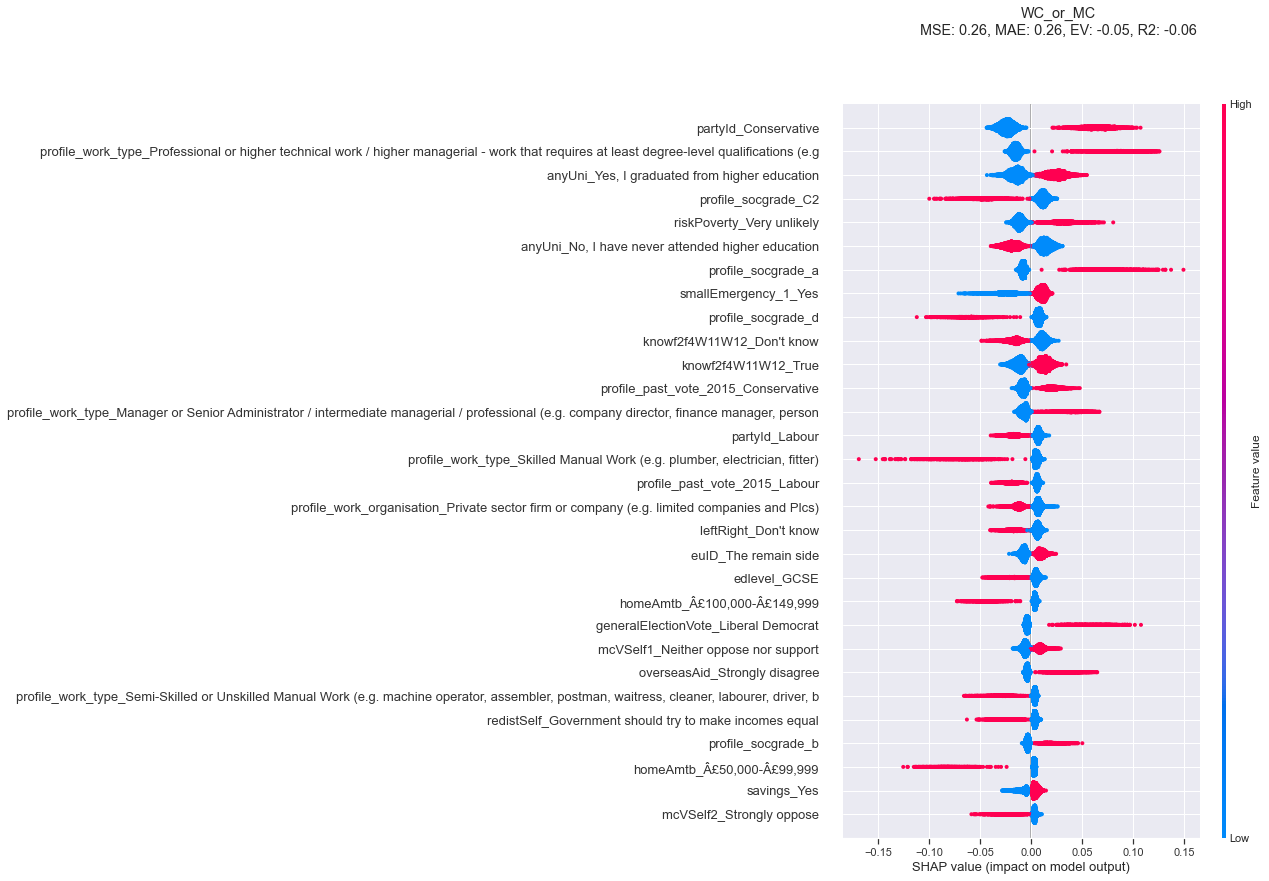

Wall time: 60 s


In [237]:
%%time
df_simp["WC_or_MC"] = BES_Panel["forcedSubjClass"].replace({"Middle class":1,"Working class":0,})

var_stub = "WC_or_MC"
Treatment = var_stub

var_list = [var_stub]
var_stub_list = [var_stub,]
mask = df_simp[var_stub].notnull()
wt_cols = []
min_features = 30
colname = var_stub
dependence_plots = False

objective = 'binary:logistic'
eval_metric = 'error'


alg = get_xgboost_alg(classification_problem=True)
title = var_stub

(explainer, shap_values, train_columns, train_index, alg,output_subfolder)=\
    xgboost_run(subdir=colname,dataset=df_simp.drop("wt",axis=1),
            var_list=var_list,var_stub_list=var_stub_list,
            use_specific_weights=df_simp["wt"],
            min_features = min(df_simp.shape[1]-1,min_features),verbosity=0,
            skip_bar_plot=True,dependence_plots=dependence_plots,alg=alg,eval_metric=eval_metric,                    
            title = title)

In [239]:
BES_Panel["profile_work_organisation"]

id
2                                            Self-employed
3        Other public sector employer (e.g. Central Gov...
7        Nationalised industry or public corporation (e...
8                                            Self-employed
9                                            Self-employed
                               ...                        
75180                                                  NaN
75181                                                  NaN
75182                                                  NaN
75183                                                  NaN
75184                                                  NaN
Name: profile_work_organisation, Length: 31063, dtype: category
Categories (7, object): ['Self-employed' < 'Private sector firm or company (e.g. limited ... < 'Nationalised industry or public corporation (... < 'Other public sector employer (e.g. Central Go... < 'Charity/voluntary sector' < 'Other' < 'Have never worked']

In [245]:
(BES_Panel["endtime"] - BES_Panel["starttime"]).max()

Timedelta('15 days 11:39:24.941000')

In [246]:
dataset_name = "W20_only"
df_list = 'BES_Panel'
#            'BES_reduced_with_na'
#           ]#,"BESnumeric"]

%matplotlib inline 
%run BES_header.py {dataset_name} {df_list}

# del BES_Panel

Toggle code

In [252]:
search(BES_Panel,"father")

fatherVote    4408
dtype: int64

In [254]:
dataset_name = "W19_comb"
df_list = 'BES_Panel'
#            'BES_reduced_with_na'
#           ]#,"BESnumeric"]

%matplotlib inline 
%run BES_header.py {dataset_name} {df_list}

# del BES_Panel

Toggle code

In [255]:
search(BES_Panel,"class")

discussantClassName1W2    24933
discussantClassName2W2    18238
discussantClassName3W2    13210
dv1ClassExpW2              5563
dv2ClassExpW2              5563
dv3ClassExpW2              5563
dv4ClassExpW2              5563
mapWorkingClassW3         15142
mapMiddleClassW3          15142
preferMPWorkClassW6        7522
forcedSubjClassW14         7939
subjClassW15               5109
subjClassW16              13775
subjClassW17              34366
subjClassW19              32177
subjClassSqueezeW19       11125
subjClassW2_W4W7W9        51537
subjClassW10W11           33086
subjClassW12W14           39578
dtype: int64

In [256]:
BES_Panel_w21comb = pd.read_stata("E:\\Users\\Gamer\\Documents\\GitHub\\BES_analysis\\BES_analysis_data\\W21_comb\\BES2019_W21_Panel_v21.0.dta")

MemoryError: Unable to allocate 7.03 GiB for an array with shape (9016, 104637) and data type float64

In [35]:
dataset_name = "W20_only"
df_list = 'BES_Panel'
#            'BES_reduced_with_na'
#           ]#,"BESnumeric"]

%matplotlib inline 
%run BES_header.py {dataset_name} {df_list}

# del BES_Panel

Toggle code

In [37]:
search(BES_Panel,"overseas|paper|asylum")

infoSourcePaper    31468
asylumMore          7902
p_paper_read       31468
dtype: int64

In [7]:
BES_Panel["profiles_newspaper2"].value_counts()

None                                           17703
The Daily Mail / The Scottish Daily Mail        3908
The Guardian                                    3136
The Sun                                         1853
The Times                                       1512
Other Newspaper                                 1336
The Daily Telegraph                             1302
The Mirror / Daily Record                        955
Other local daily morning newspaper              913
The Independent                                  658
The Express                                      529
The Financial Times                              219
The Daily Star / The Daily Star of Scotland      123
The Herald (Glasgow)                             107
The Scotsman                                      73
The Western Mail                                  39
Name: profiles_newspaper2, dtype: int64

In [38]:
(pd.crosstab( BES_Panel["asylumMore"] ,
            BES_Panel["p_paper_read"].cat.remove_categories(BES_Panel["p_paper_read"].value_counts().index[-4:]),
           values=BES_Panel["wt"],aggfunc=sum,normalize='columns')*100).astype(int)

p_paper_read,The Express,The Daily Mail / The Scottish Daily Mail,The Mirror / Daily Record,The Sun,The Daily Telegraph,The Financial Times,The Guardian,The Independent,The Times,Other local daily morning newspaper,Other Newspaper,None
asylumMore,,,,,,,,,,,,
Many fewer,40,33,24,43,25,13,3,10,15,24,20,25
1,12,8,7,6,7,3,2,3,4,6,5,4
2,12,9,11,7,13,9,2,5,6,11,8,6
3,5,9,8,8,12,5,5,3,11,6,8,7
4,4,5,6,6,6,4,2,5,8,8,5,4
5,9,13,14,7,15,17,19,22,22,17,15,14
6,1,3,8,1,3,5,11,7,10,8,5,4
7,2,2,3,1,2,20,13,15,7,3,6,5
8,0,1,4,3,3,2,11,8,1,2,2,2


In [ ]:
(pd.crosstab( BES_Panel["overseasAid"] ,
            BES_Panel["profiles_newspaper2"].cat.remove_categories(BES_Panel["profiles_newspaper2"].value_counts().index[-4:]),
           values=BES_Panel["wt"],aggfunc=sum,normalize='columns')*100).astype(int)

In [34]:
search(BES_Panel,"asylum")

Series([], dtype: float64)

In [17]:
BES_Panel["profiles_newspaper2"].value_counts()

None                                           17703
The Daily Mail / The Scottish Daily Mail        3908
The Guardian                                    3136
The Sun                                         1853
The Times                                       1512
Other Newspaper                                 1336
The Daily Telegraph                             1302
The Mirror / Daily Record                        955
Other local daily morning newspaper              913
The Independent                                  658
The Express                                      529
The Financial Times                              219
The Daily Star / The Daily Star of Scotland      123
The Herald (Glasgow)                             107
The Scotsman                                      73
The Western Mail                                  39
Name: profiles_newspaper2, dtype: int64

CategoricalIndex(['The Financial Times',
                  'The Daily Star / The Daily Star of Scotland',
                  'The Herald (Glasgow)', 'The Scotsman', 'The Western Mail'],
                 categories=['The Express', 'The Daily Mail / The Scottish Daily Mail', 'The Mirror / Daily Record', 'The Daily Star / The Daily Star of Scotland', 'The Sun', 'The Daily Telegraph', 'The Financial Times', 'The Guardian', ...], ordered=True, dtype='category')

In [41]:
dataset_name = "W19_comb"
df_list = 'BES_Panel|BES_reduced_with_na'
#           ]#,"BESnumeric"]

%matplotlib inline 
%run BES_header.py {dataset_name} {df_list}

# del BES_Panel

Toggle code

In [80]:
WorkingClass = (BES_reduced_with_na[ match(BES_reduced_with_na,"subjClassW.*working class").index ]==1.0)\
                .replace(False,np.nan).fillna(method='ffill',axis=1)["subjClassW12W14_Yes, working class"]

In [81]:
MiddleClass = (BES_reduced_with_na[ match(BES_reduced_with_na,"subjClassW.*middle class").index ]==1.0)\
                .replace(False,np.nan).fillna(method='ffill',axis=1)["subjClassW12W14_Yes, middle class"]

In [84]:
(WorkingClass&MiddleClass).sum()

4323

In [92]:
BES_Panel[match(BES_Panel,"subjClassW").index].stack().value_counts()

Yes, working class    82437
Yes, middle class     60867
No                    52704
Don't know            10325
Yes, other             3295
dtype: int64

In [98]:
%%time
unique_vals = BES_Panel[match(BES_Panel,"subjClassW").index].apply(lambda x: len(x.dropna().unique()),axis=1)

Wall time: 1min 21s


In [99]:
unique_vals.value_counts()

1    68522
2    21204
0     4298
3     2862
4      119
5        1
dtype: int64

In [100]:
WC_or_MC[unique_vals==1].value_counts()

1.0    28261
0.0    20957
Name: subjClassW12W14_Yes, working class, dtype: int64

In [107]:
WC_or_MC = WorkingClass.replace(True,0)
WC_or_MC.loc[MiddleClass==True] = 1

# WC_or_MC.loc[WorkingClass&MiddleClass] = np.nan
WC_or_MC.loc[unique_vals!=1] = np.nan
WC_or_MC.value_counts(dropna=False)

BES_reduced_with_na["WC_or_MC"] = WC_or_MC

In [52]:
# BES_reduced_with_na["WC_or_MC"] = BES_reduced_with_na["subjClassW2_W4W7W9_Yes, middle class"]
# BES_reduced_with_na.loc[BES_reduced_with_na["subjClassW10W11_No"]==1.0,"WC_or_MC"]=np.nan

MSE: 0.15, MAE: 0.31, EV: 0.39, R2: 0.39


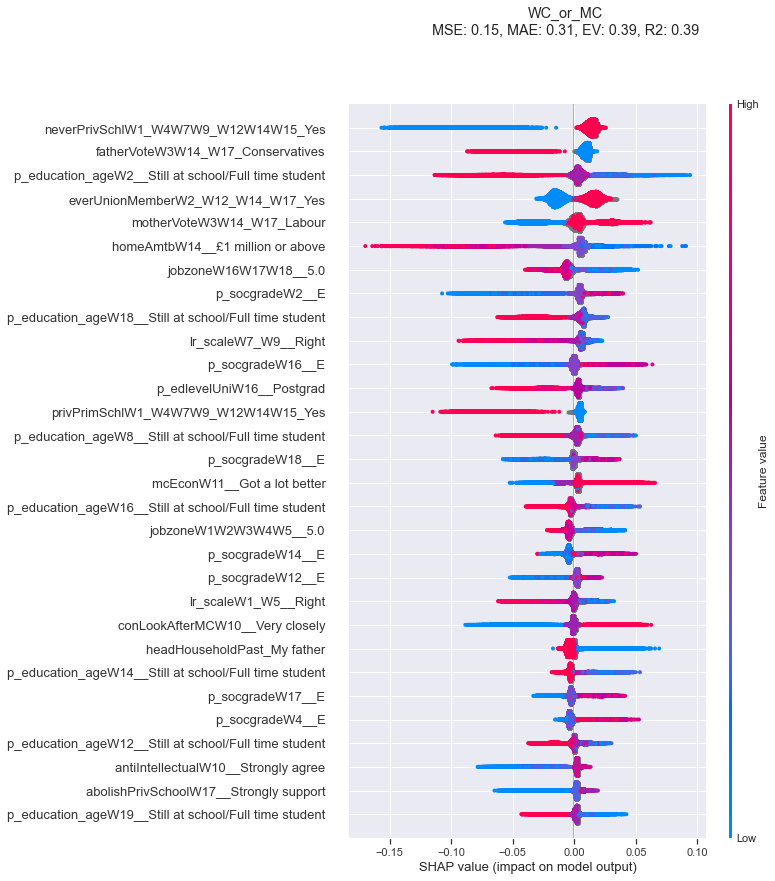

Wall time: 16min 2s


In [102]:
%%time
# df_simp = pd.get_dummies(BES_census_data.drop(drop_cols,axis=1))

var_stub = "WC_or_MC"
Treatment = var_stub

var_list = [var_stub]
var_stub_list = [var_stub,"subjClass","forcedSubjClass",'belongGroup','discussantClassName','mapWorkingClass','mapMiddleClass',
                "partyId","profile_past_vote","leftRight","redistSelf","euRef","like","EUIntegration",
                "p_eurefvote","p_past_vote",
                ]
mask = BES_reduced_with_na[var_stub].notnull()
wt_cols = []
min_features = 30
colname = var_stub
dependence_plots = False

alg = get_xgboost_alg(classification_problem=False)
title = var_stub

(explainer, shap_values, train_columns, train_index, alg,output_subfolder)=\
    xgboost_run(subdir=colname,dataset=BES_reduced_with_na,
            var_list=var_list,var_stub_list=var_stub_list,
            use_specific_weights=None,
                
                #BES_Panel["wt"],
            min_features = min(BES_reduced_with_na.shape[1]-1,min_features),verbosity=0,
            skip_bar_plot=True,dependence_plots=dependence_plots,alg=alg,eval_metric=eval_metric,                    
            title = title)

MSE: 0.14, MAE: 0.31, EV: 0.43, R2: 0.43


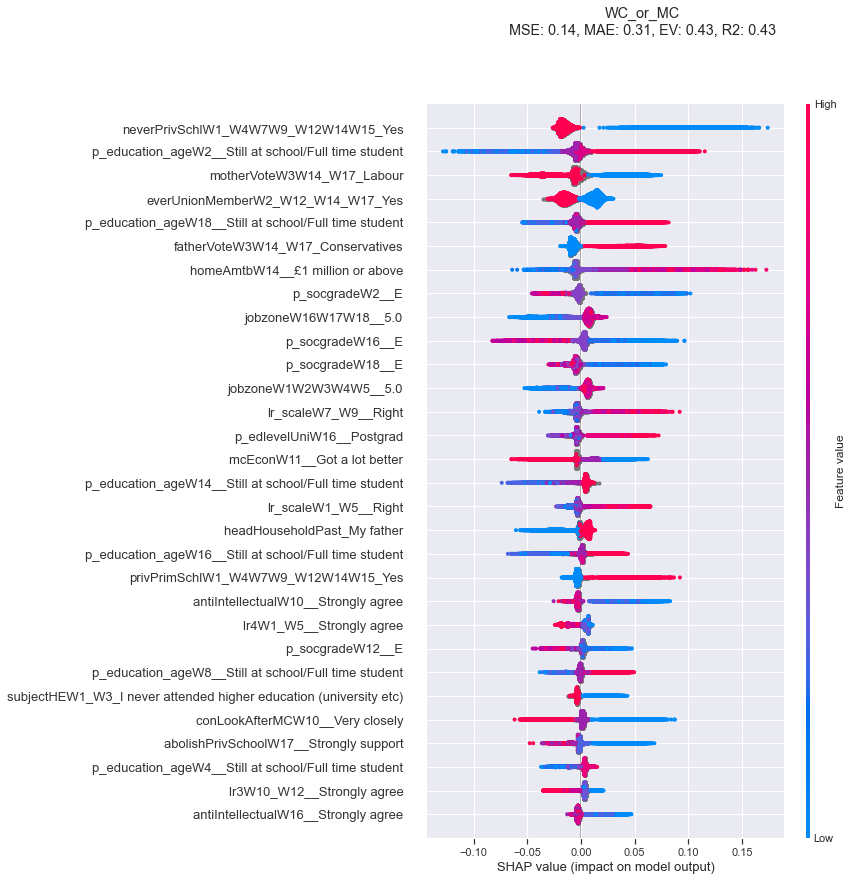

Wall time: 10min 51s


In [108]:
%%time
# df_simp = pd.get_dummies(BES_census_data.drop(drop_cols,axis=1))

var_stub = "WC_or_MC"
Treatment = var_stub

var_list = [var_stub]
var_stub_list = [var_stub,"subjClass","forcedSubjClass",'belongGroup','discussantClassName','mapWorkingClass','mapMiddleClass',
                "partyId","profile_past_vote","leftRight","redistSelf","euRef","like","EUIntegration",
                "p_eurefvote","p_past_vote",
                ]
mask = BES_reduced_with_na[var_stub].notnull()
wt_cols = []
min_features = 30
colname = var_stub
dependence_plots = False

alg = get_xgboost_alg(classification_problem=False)
title = var_stub

(explainer, shap_values, train_columns, train_index, alg,output_subfolder)=\
    xgboost_run(subdir=colname,dataset=BES_reduced_with_na,
            var_list=var_list,var_stub_list=var_stub_list,
            use_specific_weights=None,
                
                #BES_Panel["wt"],
            min_features = min(BES_reduced_with_na.shape[1]-1,min_features),verbosity=0,
            skip_bar_plot=True,dependence_plots=dependence_plots,alg=alg,eval_metric=eval_metric,                    
            title = title)

MSE: 0.15, MAE: 0.32, EV: 0.40, R2: 0.40


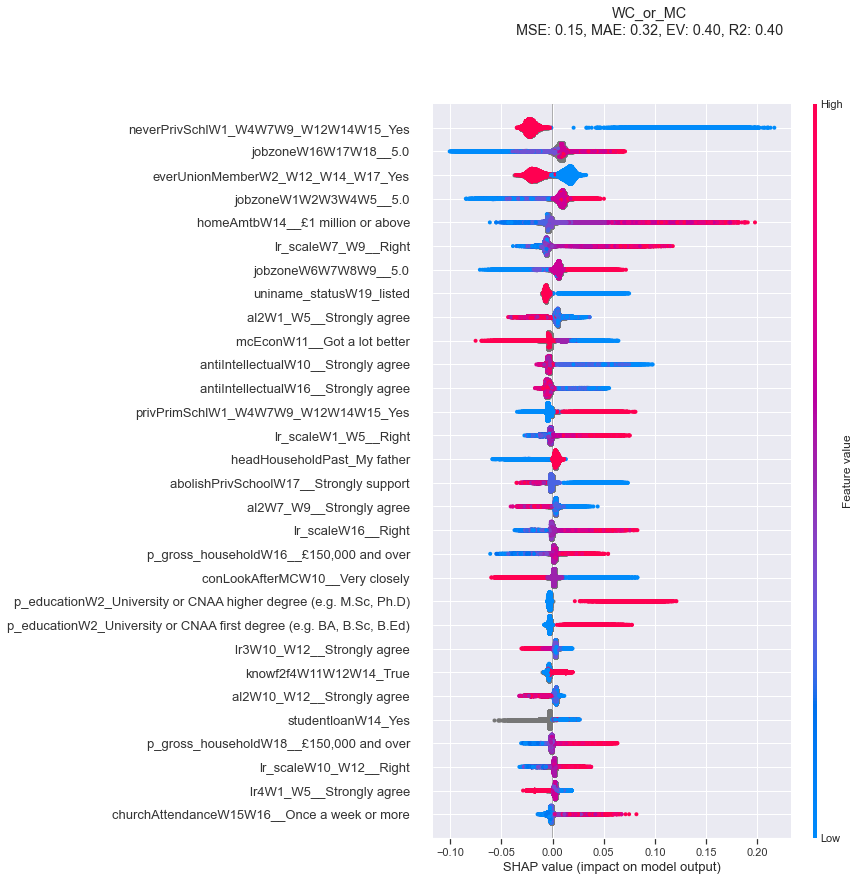

Wall time: 10min 44s


In [110]:
%%time
# df_simp = pd.get_dummies(BES_census_data.drop(drop_cols,axis=1))

var_stub = "WC_or_MC"
Treatment = var_stub

var_list = [var_stub]
var_stub_list = [var_stub,"subjClass","forcedSubjClass",'belongGroup','discussantClassName','mapWorkingClass','mapMiddleClass',
                "partyId","profile_past_vote","leftRight","redistSelf","euRef","like","EUIntegration",
                "p_eurefvote","p_past_vote",
                 "p_education_age","subjectHE","edlevel","anyUni","fatherVote","motherVote","p_socgrade",
                ]
mask = BES_reduced_with_na[var_stub].notnull()
wt_cols = []
min_features = 30
colname = var_stub
dependence_plots = False

alg = get_xgboost_alg(classification_problem=False)
title = var_stub

(explainer, shap_values, train_columns, train_index, alg,output_subfolder)=\
    xgboost_run(subdir=colname,dataset=BES_reduced_with_na,
            var_list=var_list,var_stub_list=var_stub_list,
            use_specific_weights=None,
                
                #BES_Panel["wt"],
            min_features = min(BES_reduced_with_na.shape[1]-1,min_features),verbosity=0,
            skip_bar_plot=True,dependence_plots=dependence_plots,alg=alg,eval_metric=eval_metric,                    
            title = title)

In [ ]:
## W11 belongGroup
## W2 discussantClassName
## W3 mapWorkingClass,mapMiddleClass

# 'belongGroup','discussantClassName','mapWorkingClass','mapMiddleClass'

In [ ]:
## father/mother variables

In [104]:
BES_Panel["p_education_ageW11"]

id
1        NaN
2        20+
3        20+
4        NaN
5        NaN
        ... 
98447    NaN
98448    NaN
98449    NaN
98450    NaN
98451    NaN
Name: p_education_ageW11, Length: 97006, dtype: category
Categories (7, object): ['15 or under' < '16' < '17-18' < '19' < '20+' < 'Still at school/Full time student' < 'Can't remember']

In [116]:
search(BES_Panel,"neverPriv")

neverPrivSchlW17                     3564
neverPrivSchlW1_W4W7W9_W12W14W15    76173
dtype: int64

In [118]:
BES_Panel["neverPrivSchlW1_W4W7W9_W12W14W15"][mask].value_counts(dropna=False,normalize=True)

Yes           0.639766
NaN           0.221200
No            0.132959
Don't know    0.006075
Name: neverPrivSchlW1_W4W7W9_W12W14W15, dtype: float64

In [121]:
# BES_Panel["leftRight"]
search(BES_Panel,"leftRight")

leftRightW1     30539
leftRightW2     30261
leftRightW3     27828
leftRightW4     31549
leftRightW5     30970
leftRightW6     30258
leftRightW7     30895
leftRightW8      6053
leftRightW9      7442
leftRightW10    30237
leftRightW11    30956
leftRightW12    34394
leftRightW13    31136
leftRightW14    31063
leftRightW15    30842
leftRightW16    37959
leftRightW17    34366
leftRightW18    37825
leftRightW19    32177
dtype: int64

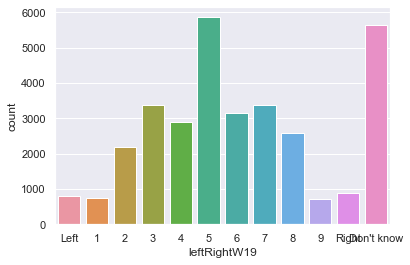

In [125]:
sns.countplot(x=BES_Panel["leftRightW19"])

In [124]:
BES_Panel["leftRightW19"]

id
1               NaN
2                 7
3                 4
4               NaN
5               NaN
            ...    
98447           NaN
98448           NaN
98449    Don't know
98450           NaN
98451           NaN
Name: leftRightW19, Length: 97006, dtype: category
Categories (12, object): ['Left' < '1' < '2' < '3' ... '8' < '9' < 'Right' < 'Don't know']